<a href="https://colab.research.google.com/github/adithyaka3/multilayer-perceptron/blob/main/multilayer_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron

A perceptron is a type of artificial neural network unit that is used in supervised learning. It is a simple model of a biological neuron that forms the building block for more complex neural network architectures. The perceptron algorithm learns a linear decision boundary to separate different classes in the input data.

## Perceptron Algorithm

The perceptron algorithm consists of the following steps:

1. **Initialization**: Initialize the weights $\mathbf{w}$ to small random values.
2. **Input**: For each training example $x_i$ with label $y_i$:
   - Compute the weighted sum:
     
     $$z = \mathbf{w} \cdot x_i$$
     
   
   - Update the weights if there is a misclassification by following the perceptron weight update rule.
   
 ## Perceptron Weight Update Rule

The weight update rule for the perceptron algorithm can be described as follows:

$$\mathbf{w}_{k+1} = \begin{cases}
\mathbf{w}_k + y_j \mathbf{x}_j & \text{if } y_j (\mathbf{w}_k^T \mathbf{x}_j) < 0 \\
\mathbf{w}_k & \text{if } y_j (\mathbf{w}_k^T \mathbf{x}_j) \geq 0
\end{cases}$$

Where:

* $\mathbf{w}_{k+1}$ is the updated weight vector.
* $\mathbf{w}_k$ is the current weight vector.
* $y_j$ is the true label of the $j$-th sample.
* $\mathbf{x}_j$ is the $j$-th sample.
* $\mathbf{w}_k^T \mathbf{x}_j$ is the dot product of the weight vector and the sample.








In [ ]:
#Importing all libraries
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt


## Modified One-Hot Encoding

Modified one-hot encoding is a variant of traditional one-hot encoding where instead of using binary values (0 and 1) to represent categorical data, we employ -1 and 1. This approach can sometimes be beneficial in certain machine learning algorithms.

**Example:**

Consider a categorical feature with three possible categories: A, B, and C.
* Traditional one-hot encoding:
  * A: [1, 0, 0]
  * B: [0, 1, 0]
  * C: [0, 0, 1]
* Modified one-hot encoding:
  * A: [1, -1, -1]
  * B: [-1, 1, -1]
  * C: [-1, -1, 1]

    This approach is required while implementing MLP because the updation rule involves multiplying $y_j$ to $\mathbf{x_j}$ and if $y_j$ is 0, this would mean that there is no updation. Hence we replace 0 with -1. This allows the model to update the parameters aptly.

In [ ]:
#This function represent the modified one hot encoding though it is names one_hot()
def one_hot(y:list[int], depth = 10):
  result = np.array([np.array([-1]*depth) for _ in range(len(y))])

  for i, v in enumerate(y):
    result[i][v] = 1
  return result



In [ ]:
(train_data, train_label), (test_data, test_label) =mnist.load_data() #load data from the MNIST dataset

train_data = train_data.reshape((60000, 28*28))
test_data = test_data.reshape((10000, 28*28))

test_label = one_hot(test_label, 10)
train_label = one_hot(train_label, 10)

train_data = train_data / 255             #Normalize Data (For Better Learning)

In [ ]:
#Start with an arbitary W matrix
W = np.random.randn(10, 28*28)
epochs = 2000

In [ ]:
#Training the model
import time
start_time = time.time()

for _ in range(epochs):
  for i in range(len(train_data)):
    x = train_data[i]
    y = train_label[i]
    y_hat = np.dot(W, x)


    for j in range(len(y_hat)):
      if y[j]*y_hat[j] < 0:
        W[j] = W[j] + y[j]*x

end_time = time.time()
print("Time taken: ", end_time-start_time)
print("Training the model is complete")






Time taken:  2.093618869781494


Accuracy: 0.79
7 1 1 9 8 4 0 3 1 5 
2 7 2 9 0 2 0 3 3 2 
0 0 9 6 6 5 9 6 0 9 
6 6 3 0 2 3 7 1 6 4 
9 7 6 8 9 0 1 8 1 4 
8 2 9 5 2 0 1 9 7 1 
6 4 3 5 8 1 1 1 5 4 
9 6 3 0 8 3 7 8 1 6 
8 7 3 0 1 5 5 4 7 9 
3 9 9 4 4 2 1 1 7 9 


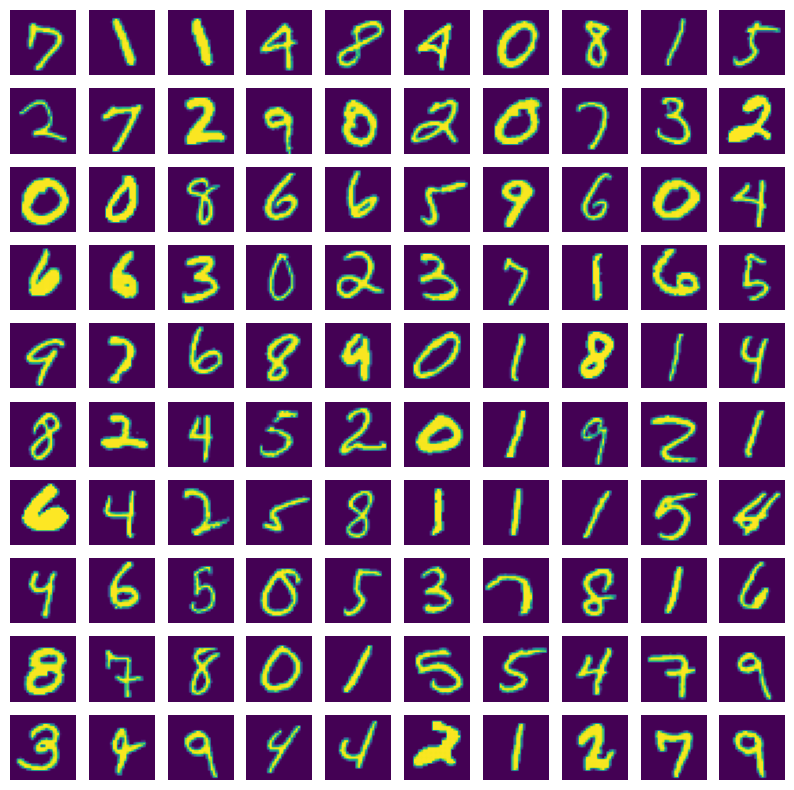

In [ ]:
#Results and testing
num_samples = test_data.shape[0]
random_indices = np.random.choice(num_samples, 100, replace=False)

X_sample = test_data[random_indices]
y_sample = test_label[random_indices]
predictions = []
correct_samples = 0

plt.figure(figsize=( 10, 10))
for i in range(len(X_sample)):
    ax = plt.subplot(10, 10, i+1)
    plt.imshow((X_sample[i]).reshape((28,28)))

    x = X_sample[i]
    y = y_sample[i]

    y_hat = np.dot(W, x)
    predictions.append(np.argmax(y_hat))
    if np.argmax(y_hat) == np.argmax(y):
        correct_samples += 1
    plt.axis("off")

print(f"Accuracy: {correct/len(X_sample)}")
for i in range(10):
    for j in range (10):
        print(predictions[10*i+j],end=" ")
    print()